In [2]:
from tsai.imports import *
from tsai.models.layers import *
from torchinfo import summary
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from scipy import signal
from PyEMD import EMD
from PyEMD import EEMD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
num_class = 12
close_num = 11 # 11か12か注意（close numを使ってるとこと整合性とれてるか）
batch_size = 96
learning_rate = 0.0001
num_epochs = 300
sequence_len = 1000 * 5 # sampling_rate * second
overlap = int(sequence_len * 0.3)
alpha = 0.1

In [199]:
len(seg_list[0][256][0])

3999

In [69]:
def segmentation(end_idx, sequence_len, overlap, data_list):
    """
    データのセグメンテーションを行う
    segmentation(len(data_np_unfil_norm), sequence_len, overlap, data_list)
    """
    seg_list = []

    for data in data_list:
        n = 0
        n_stop = sequence_len
        data_segs = []
        while n_stop < end_idx:
            n_start = 0 + ((sequence_len - 1) - (overlap - 1)) * n
            n_stop = n_start + sequence_len
            seg = data[n_start:n_stop].copy()
            if len(seg) == 5000:
                data_segs.append([seg])
            n += 1
        seg_list.append(data_segs)
    return seg_list

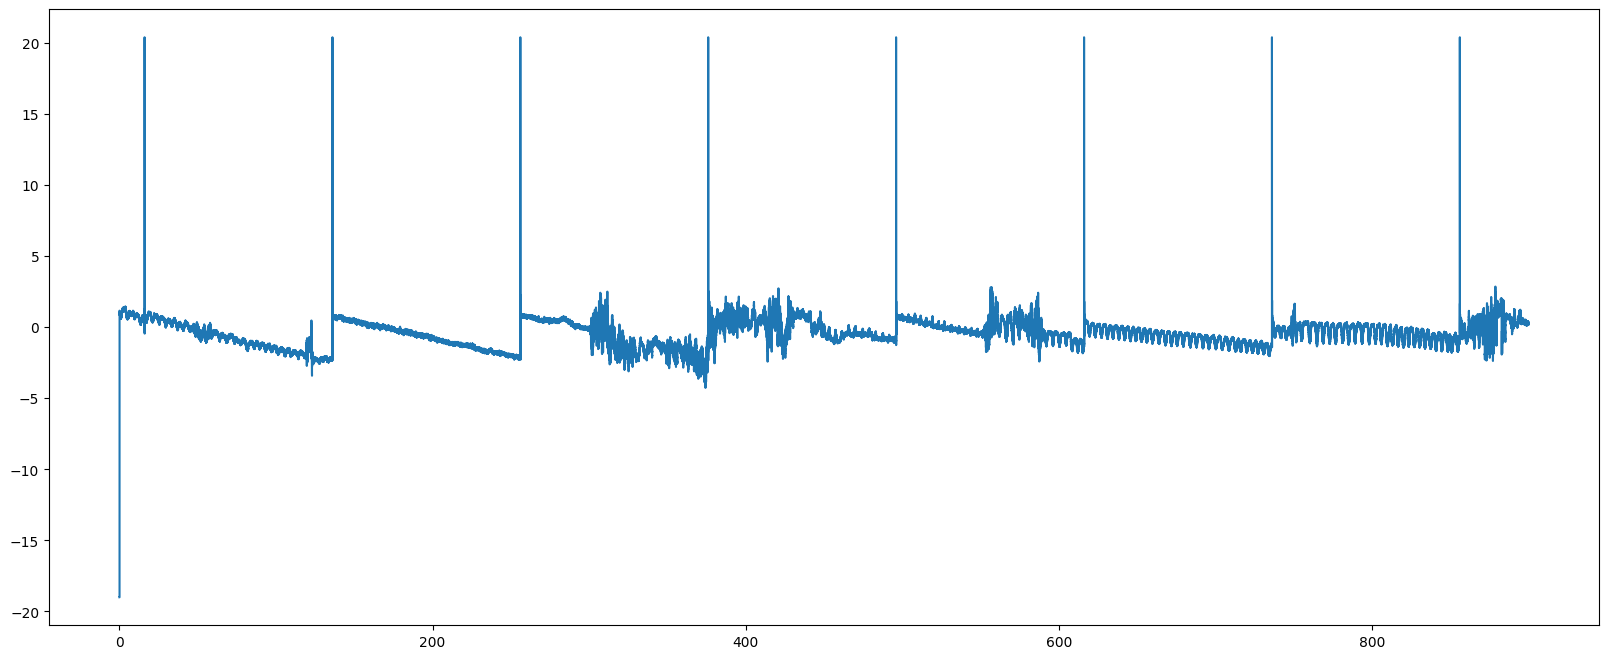

In [162]:
plt.figure(figsize=(20, 8))
t = np.linspace(0, 900, len(data_np_unfil_ID1)) # 必要
plt.plot(t, data_np_unfil_ID1)

In [70]:
data_list = []
seg_list = []

scaler = MinMaxScaler((0, 1))
scaler = StandardScaler()

for i in range(1, num_class + 1):
    # file_path = "./data/BPF/filterd%02d.csv" % i
    # file_path = "./data/BPF/unfilterd%02d.csv" % i
    file_path = "./data/Keio Hospital/I_raw_%02d.csv" % i
    data_unfil = pd.read_csv(file_path)
    scaler.fit(data_unfil) # normalize data
    data_unfil_norm = scaler.transform(data_unfil)
    data_np_unfil_norm = data_unfil_norm.flatten()
    data_np_unfil_norm = data_np_unfil_norm[:899999] # データ数を揃える

    data_list.append(data_np_unfil_norm) # data_list idx:0~close_num-1
    if i == 1:
        data_np_unfil_ID1 = data_np_unfil_norm[:899999]
    # df_fil = pd.DataFrame(data_fil)
    # data_unfil = pd.read_csv(file_path_unfil)
    # df_unfil = pd.DataFrame(data_unfil)

seg_list = segmentation(len(data_np_unfil_norm), sequence_len, overlap, data_list)
    # segmentationで置き換えた
    # end = len(data_np_unfil_norm)
    # n = 0
    # n_stop = sequence_len
    # data_segs = []
    # while n_stop < end:
    #     n_start = 0 + ((sequence_len - 1) - (overlap - 1)) * n
    #     n_stop = n_start + sequence_len
    #     tmp = []
    #     seg = data_np_unfil_norm[n_start:n_stop].copy()
    #     data_segs.append([seg])
    #     n += 1

    # data_list.append(data_segs)

### Apply EMD

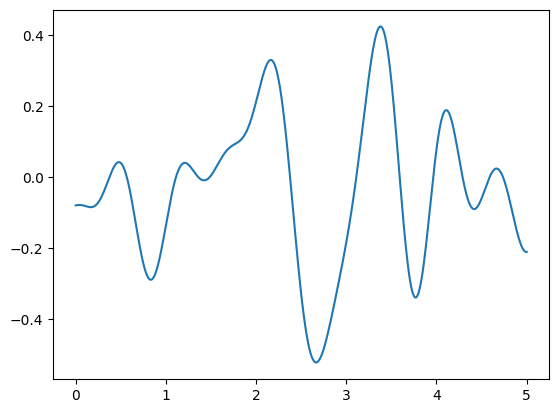

In [133]:
plt.plot(t, s)

In [178]:
len(seg_list[0])

257

### apply and save emd

In [37]:
emd_list = []

for i in range(len(seg_list)):
    emd_list_per_ID = []
    for j in range(len(seg_list[i])):
        t = np.linspace(0, 5, 5000) # 必要
        s = seg_list[i][j][0] # 必要
        IMF = EMD().emd(s, t) # 必要
        emd_list_per_ID.append(IMF)
    emd_list.append(emd_list_per_ID)

In [66]:
len(emd_list[0][0])

10

In [38]:
import pickle
with open("emd_list.pkl", "wb") as f:
    pickle.dump(emd_list, f)

### load emd

In [29]:
with open("emd_list.pkl", "rb") as f:
    emd_list = pickle.load(f)
emd_list

[[array([[-4.45727956e-01,  2.14311868e+00,  4.44600455e+00, ...,
          -1.17286316e-02,  1.08364595e-02, -1.80313357e-03],
         [-1.29793933e+01, -1.57073051e+01, -1.81183614e+01, ...,
          -4.17923958e-03, -1.84469742e-02, -1.50093239e-02],
         [ 1.28204489e+01,  1.29383024e+01,  1.30395861e+01, ...,
           2.01039331e-03,  2.33200058e-03,  1.83194487e-03],
         ...,
         [-4.35619098e+00, -4.34572576e+00, -4.33524051e+00, ...,
           2.34825644e-02,  2.34719014e-02,  2.34590284e-02],
         [-1.71000412e+00, -1.70702721e+00, -1.70404888e+00, ...,
          -1.58602678e-02, -1.54744154e-02, -1.50872237e-02],
         [-1.17526975e-01, -1.16851702e-01, -1.16175957e-01, ...,
           7.31751681e-01,  7.31473672e-01,  7.31196012e-01]]),
  array([[-4.66682060e-03, -3.74349793e-02,  3.83599060e-02, ...,
          -3.22401657e-02,  3.40203612e-02,  3.60928876e-02],
         [-1.42449452e-03,  4.61791812e-03, -2.79663701e-03, ...,
          -1.82067157e

In [5]:
eemd_list = []

for i in range(len(seg_list)):
    eemd_list_per_ID = []
    for j in range(len(seg_list[i])):
        t = np.linspace(0, 5, 5000) # 必要
        s = seg_list[i][j][0] # 必要
        eemd = EEMD()
        emd = eemd.EMD
        emd.extrema_detection = "parabol"
        eIMFs = eemd.eemd(s, t)
        eemd_list_per_ID.append(eIMFs)
    eemd_list.append(eemd_list_per_ID)

#### Save EEMD Result

In [7]:
import pickle
with open("eemd_list.pkl", "wb") as f:
    pickle.dump(eemd_list, f)

In [ ]:
with open("eemd_list.pkl", "rb") as f:
    hoge = pickle.load(f)
hoge

In [181]:
len(IMF[0])

5000

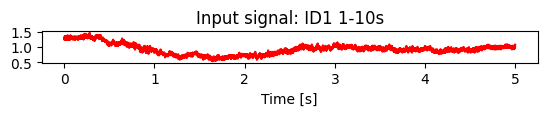

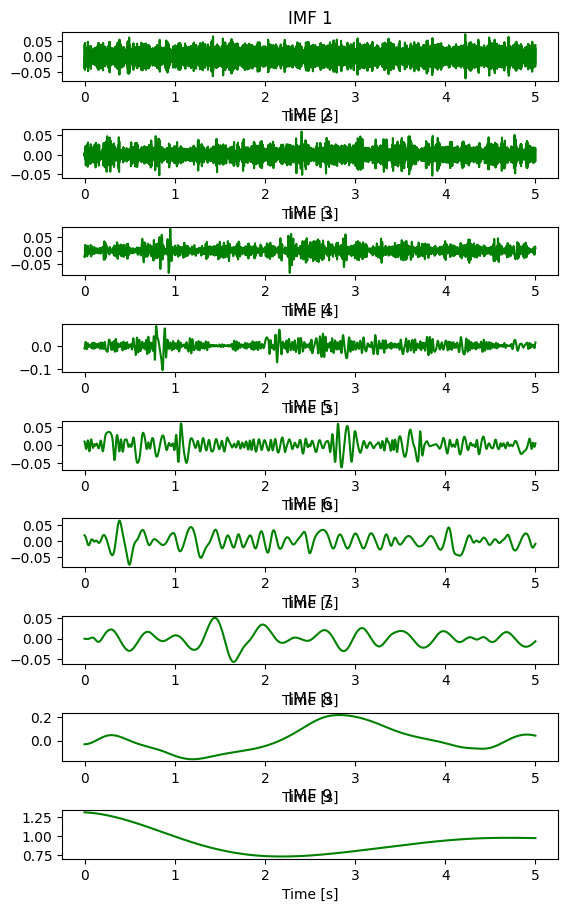

In [240]:
t = np.linspace(0, 5, 5000) # 必要
s = seg_list[0][1][0] # 必要

IMF = EMD().emd(s, t) # 必要
N = IMF.shape[0] + 1 # IMF 5, 6, 7

plt.subplot(N, 1, 1)
plt.plot(t, s, 'r')
plt.title("Input signal: ID1 1-10s")
plt.xlabel("Time [s]")
plt.figure(figsize=(6.4, 12))
plt.subplots_adjust(hspace=1.0)

for n, imf in enumerate(IMF):
    plt.subplot(N, 1, n + 2)
    plt.plot(t, imf, 'g')
    plt.title("IMF " + str(n + 1))
    plt.xlabel("Time [s]")
# plt.savefig("emd_example")
plt.show()

In [65]:
len(seg_list[0][0][0])

5000

### うまくいったので残しておく

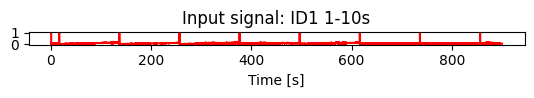

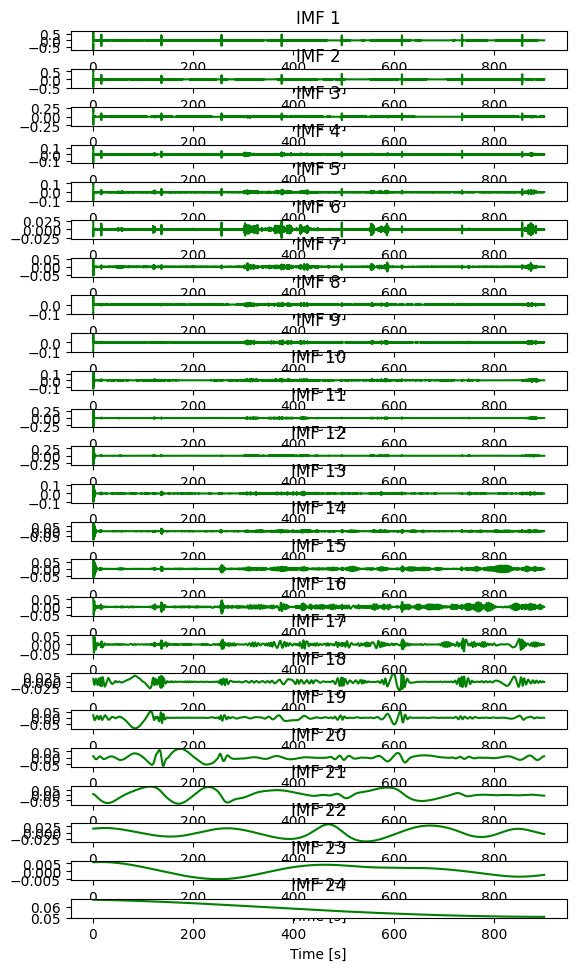

In [35]:
t = np.linspace(1, 900, 900000-1)
s = data_np_unfil_ID1
IMF = EMD().emd(s, t)
N = IMF.shape[0] + 1

plt.subplot(N, 1, 1)
plt.plot(t, s, 'r')
plt.title("Input signal: ID1 1-10s")
plt.xlabel("Time [s]")
plt.figure(figsize=(6.4, 12))
plt.subplots_adjust(hspace=1.0)

for n, imf in enumerate(IMF):
    plt.subplot(N, 1, n + 2)
    plt.plot(t, imf, 'g')
    plt.title("IMF " + str(n + 1))
    plt.xlabel("Time [s]")
# plt.savefig("emd_example")
plt.show()

### Apply EEMD

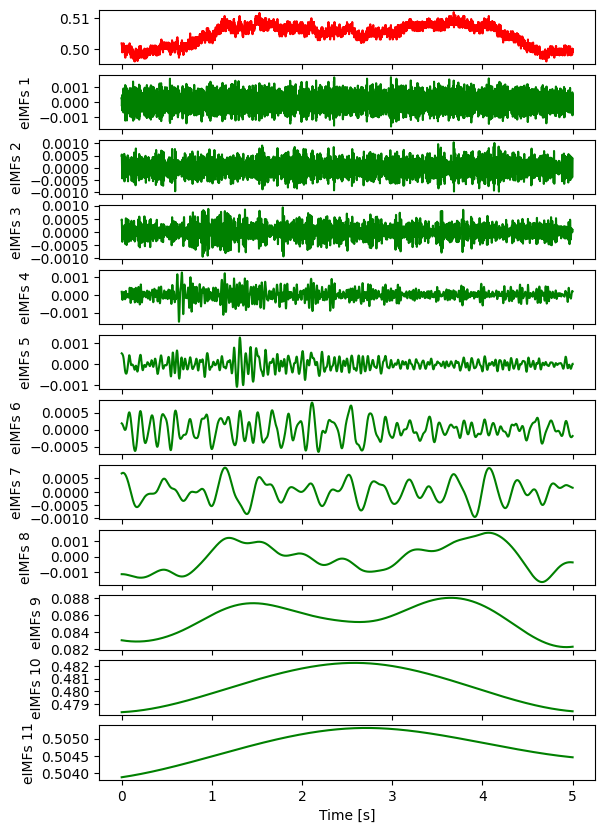

In [175]:
t = np.linspace(0, 5, 5000)
s = data_np_unfil_ID1[5001:10001]
eemd = EEMD()
emd = eemd.EMD
emd.extrema_detection = "parabol"
eIMFs = eemd.eemd(s, t)
nIMFs = eIMFs.shape[0]

plt.figure(figsize=(6.4, 10))
plt.subplot(nIMFs + 1, 1, 1)
plt.plot(t, s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMFs %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
plt.xlabel("Time [s]")
# plt.savefig('eemd_all', dpi=120)
plt.show()

IMF１つだけ採用の場合は．下のは使うな．

#### IMF 4~6を採用するから1つのセグメントにつき3つのラベルをつける

In [30]:
labels = []
for i in range(len(seg_list)):
    for j in range(len(seg_list[i])):
        if i <= close_num:
            labels.append(i)
            labels.append(i) # IMF１つ採用の場合はコメントアウト
            # labels.append(i) # IMF2つ採用の場合はコメントアウト
        else:
            labels.append(close_num + 1) # for open set
            labels.append(close_num + 1) # IMF１つ採用の場合はコメントアウト
            # labels.append(close_num + 1) # IMF2つ採用の場合はコメントアウト

### 注意！labelは上のコードではうまくいっていないかも

In [10]:
with open("(e)emd_labels.pkl", "wb") as f:
    pickle.dump(labels, f)

### ロードするととりあえず数は合う

In [7]:
with open("(e)emd_labels.pkl", "rb") as f:
    labels = pickle.load(f)
len(labels)

9216

### IMF4-6を使う

In [31]:
emd_data_list = []
for i in range(close_num + 1):
    for j in range(len(emd_list[i])):
        # emd_data_list.append([emd_list[i][j][4 - 1]]) # IMF4
        emd_data_list.append([emd_list[i][j][5 - 1]]) # IMF5
        emd_data_list.append([emd_list[i][j][6 - 1]]) # IMF6

In [275]:
len(emd_list[0])

256

In [287]:
len(emd_data_list[0][0])

5000

### Apply wavelet reconstruction (Transform + Inverse transform)
ecg_filterをemd_data_list（の必要なIMF）に適用する．

In [32]:
import pywt
def ecg_filter(data): # data: 1d array
    coeffs = pywt.wavedec(data,'db8',level=7)
    for i in np.arange(0,1,1):
        coeffs[i] = np.zeros_like(coeffs[i])
        # print(f"1: {i}")
    for i in np.arange(-1,-2,-1):
        coeffs[i] = np.zeros_like(coeffs[i])
        # print(f"2: {i}")
    # print(coeffs)
    renc = pywt.waverec(coeffs, 'db8')    
    return renc

In [33]:
emd_rec_list = []
for imf in emd_data_list:
    imf_rec = ecg_filter(imf)
    emd_rec_list.append(imf_rec)

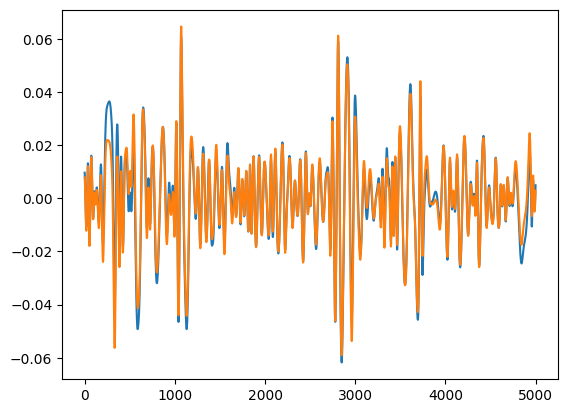

In [35]:
plt.plot(emd_data_list[2][0])
emd_rec = ecg_filter(emd_data_list[2][0])
plt.plot(emd_rec)

In [36]:
# data_tensor_list = torch.tensor(emd_data_list)
data_tensor_list = torch.tensor(emd_rec_list)
labels_tensor = torch.tensor(labels)
data_tensor_list.shape, labels_tensor.shape

(torch.Size([6144, 1, 5000]), torch.Size([6144]))

In [37]:
class InceptionModule(Module):
    def __init__(self, ni, nf, ks=40, bottleneck=True):
        ks = [ks // (2**i) for i in range(3)]
        ks = [k if k % 2 != 0 else k - 1 for k in ks]  # ensure odd ks
        bottleneck = bottleneck if ni > 1 else False
        self.bottleneck = Conv1d(ni, nf, 1, bias=False) if bottleneck else noop
        self.convs = nn.ModuleList([Conv1d(nf if bottleneck else ni, nf, k, bias=False) for k in ks])
        self.maxconvpool = nn.Sequential(*[nn.MaxPool1d(3, stride=1, padding=1), Conv1d(ni, nf, 1, bias=False)])
        self.concat = Concat()
        self.bn = BN1d(nf * 4)
        self.act = nn.ReLU()

    def forward(self, x):
        input_tensor = x
        x = self.bottleneck(input_tensor)
        x = self.concat([l(x) for l in self.convs] + [self.maxconvpool(input_tensor)])
        return self.act(self.bn(x))


@delegates(InceptionModule.__init__)
class InceptionBlock(Module):
    def __init__(self, ni, nf=32, residual=True, depth=6, **kwargs):
        self.residual, self.depth = residual, depth
        self.inception, self.shortcut = nn.ModuleList(), nn.ModuleList()
        for d in range(depth):
            self.inception.append(InceptionModule(ni if d == 0 else nf * 4, nf, **kwargs))
            if self.residual and d % 3 == 2: 
                n_in, n_out = ni if d == 2 else nf * 4, nf * 4
                self.shortcut.append(BN1d(n_in) if n_in == n_out else ConvBlock(n_in, n_out, 1, act=None))
        self.add = Add()
        self.act = nn.ReLU()
        
    def forward(self, x):
        res = x
        for d, l in enumerate(range(self.depth)):
            x = self.inception[d](x)
            if self.residual and d % 3 == 2: res = x = self.act(self.add(x, self.shortcut[d//3](res)))
        return x

    
@delegates(InceptionModule.__init__)
class InceptionTime(Module):
    def __init__(self, c_in, c_out, seq_len=None, nf=32, nb_filters=None, **kwargs):
        nf = ifnone(nf, nb_filters) # for compatibility
        self.inceptionblock = InceptionBlock(c_in, nf, **kwargs) # c_in is input channel num of conv1d
        self.gap = GAP1d(1)
        self.fc = nn.Linear(nf * 4, c_out) # c_out is 1d output size 
        self.fc_tsne = nn.Linear(nf * 4, 2)
        self.two_vecs_train = [] # list is faster in appending
        self.two_vecs_test = []

    def forward(self, x):
        x = self.inceptionblock(x)
        x = self.gap(x)
        # two_dimensional_vec = self.fc_tsne(x)
        # if self.training:
        #     self.two_vecs_train.append(two_dimensional_vec.tolist()) # あとでネストしたものをまとめてtensorかndarrayに変換するため
        # else:
        #     self.two_vecs_test.append(two_dimensional_vec.tolist())
        x = self.fc(x)
        return x

In [38]:
class HCU_Dataset(Dataset):
    def __init__(self, dataset, labels) -> None:
        # super().__init__()
        self.radar_heartbeat = dataset
        self.labels = labels

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
          idx = idx.tolist()        
        return self.radar_heartbeat[idx], self.labels[idx]

    def __len__(self):
        return len(self.radar_heartbeat)


dataset = HCU_Dataset(data_tensor_list, labels_tensor)

In [39]:
close_train_size = int(0.80 * len(dataset))
close_test_size = len(dataset) - close_train_size
close_train_set, close_test_set = torch.utils.data.random_split(dataset, [close_train_size, close_test_size])
print(f"Train Set: {len(close_train_set)}, Test Set: {len(close_test_set)}")
train_loader = DataLoader(dataset=close_train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=close_test_set, batch_size=batch_size, shuffle=False)

Train Set: 4915, Test Set: 1229


In [40]:
from torch import log
softmax = nn.Softmax()

def softmax_loss(outputs, labels):
    loss = 0
    batch_size = len(labels)
    logsoftmax_out = log(softmax(outputs))
    for idx in range(batch_size):
        loss += 1.0 - logsoftmax_out[idx][labels[idx]]
    
    return loss / batch_size


from center_loss import CenterLoss
center_loss = CenterLoss(num_classes=close_num + 1, feat_dim=close_num + 1, use_gpu=True) # 入出力が同じだと一見変な感じがするが，交差エントロピーと違ってcenterlossを使うと最初から決めていれば，モデルの出力サイズを必ずしもクラス数に一致させる必要がないからfeat_dimを任意に設定できる．
optimizer_centloss = torch.optim.SGD(center_loss.parameters(), lr=0.05)


class AngularPenaltySMLoss(nn.Module):

    def __init__(self, in_features, out_features, loss_type='cosface', eps=1e-7, s=None, m=None):
        '''
        Angular Penalty Softmax Loss
        Three 'loss_types' available: ['arcface', 'sphereface', 'cosface']
        These losses are described in the following papers: 
        
        ArcFace: https://arxiv.org/abs/1801.07698
        SphereFace: https://arxiv.org/abs/1704.08063
        CosFace/Ad Margin: https://arxiv.org/abs/1801.05599
        '''
        super(AngularPenaltySMLoss, self).__init__()
        loss_type = loss_type.lower()
        assert loss_type in  ['arcface', 'sphereface', 'cosface']
        if loss_type == 'arcface':
            self.s = 64.0 if not s else s
            self.m = 0.5 if not m else m
        if loss_type == 'sphereface':
            self.s = 64.0 if not s else s
            self.m = 1.35 if not m else m
        if loss_type == 'cosface':
            self.s = 32.0 if not s else s
            self.m = 0.2 if not m else m
        self.loss_type = loss_type
        self.in_features = in_features
        self.out_features = out_features
        self.fc = nn.Linear(in_features, out_features, bias=False)
        self.fc.to(device)
        self.eps = eps

    def forward(self, x, labels):
        '''
        input shape (N, in_features)
        '''
        assert len(x) == len(labels)
        assert torch.min(labels) >= 0
        assert torch.max(labels) < self.out_features
        
        for W in self.fc.parameters():
            W = F.normalize(W, p=2, dim=1)

        x = F.normalize(x, p=2, dim=1)
        # logを引き算に変えて計算
        wf = self.fc(x)
        if self.loss_type == 'cosface':
            numerator = self.s * (torch.diagonal(wf.transpose(0, 1)[labels]) - self.m)
        if self.loss_type == 'arcface':
            numerator = self.s * torch.cos(torch.acos(torch.clamp(torch.diagonal(wf.transpose(0, 1)[labels]), -1.+self.eps, 1-self.eps)) + self.m)
        if self.loss_type == 'sphereface':
            numerator = self.s * torch.cos(self.m * torch.acos(torch.clamp(torch.diagonal(wf.transpose(0, 1)[labels]), -1.+self.eps, 1-self.eps)))

        excl = torch.cat([torch.cat((wf[i, :y], wf[i, y+1:])).unsqueeze(0) for i, y in enumerate(labels)], dim=0)
        denominator = torch.exp(numerator) + torch.sum(torch.exp(self.s * excl), dim=1)
        L = numerator - torch.log(denominator)
        return -torch.mean(L)

cos_loss = AngularPenaltySMLoss(close_num + 1, close_num + 1, loss_type="cosface") # center_lossと同じ理由でin_featuresはクラス数でよい．


def triple_joint_loss(output, label, alpha):
    # alpha: hyper parameter
    output_only_truth = []
    for idx, x in enumerate(output):
        x = x[labels[idx]]
        x = torch.tensor(x).to(device)
        output_only_truth.append([x])
    output_only_truth = torch.tensor(output_only_truth)
    output_only_truth = output_only_truth.float()
    output_only_truth = output_only_truth.to(device)
    # print(output.is_cuda, output_only_truth.is_cuda, label.is_cuda)

    return softmax_loss(output, label) + alpha * center_loss(output, label)
    # return softmax_loss(output, label) + alpha * center_loss(output, label) + cos_loss(output, label)
    # return cos_loss(output_only_truth, label)

In [41]:
from fastprogress.fastprogress import master_bar, progress_bar
mb = master_bar(range(num_epochs))

In [21]:
torch.save(model.state_dict(), './models/emd_wav3.pth')

In [42]:
model = InceptionTime(1, close_num + 1)
model = model.to(device)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_total_steps = len(train_loader)
for epoch in mb:
    for i, (signals, labels) in enumerate(progress_bar(train_loader, parent=mb)):
        signals = signals.float()
        signals = signals.to(device)
        labels = labels.to(device)
        outputs = model(signals)
        outputs = outputs.to(device)
        loss = triple_joint_loss(outputs, labels, alpha)
        optimizer.zero_grad()
        optimizer_centloss.zero_grad()
        loss.backward()
        for param in center_loss.parameters():
            param.grad.data *= (1./alpha)
        optimizer.step()
        optimizer_centloss.step()
        # if (i + 1) % 10 == 0:
            # print(f'Epoch [{epoch+1}/`{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    mb.write("Finished Epoch: {0:02d}, Training Loss: {1:10.5f}".format(epoch+1, loss.item()))

/tmp/ipykernel_3321/3433469541.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(device)
/mnt/c/Users/grpro/workspace/grad_thesis/InceptionTime/env/lib/python3.9/site-packages/torch/overrides.py:1498: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = torch_func_method(public_api, types, args, kwargs)


KeyboardInterrupt: 

In [43]:
# For Confusion Matrix
predicted_lists = np.zeros(0, dtype=np.int64)
one_hot_labels_list = np.zeros(0, dtype=np.int64)
model.eval()

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  softmax = nn.Softmax()
  for i, (signals, one_hot_labels) in enumerate(test_loader):
    signals = signals.float()
    signals = signals.to(device)
    one_hot_labels = one_hot_labels.to(device)
    outputs = model(signals)
    for j, out in enumerate(outputs):
      outputs[j] = softmax(out)
    _, predicted = torch.max(outputs.data, 1) # predicted per batch size
    """
    Opensetのためのthreshold-softmax
    for idx in range(len(_)):
      if _[idx] < threshold:
        predicted[idx] = Unknown_label # 15, 20, 25
    """
    print(_, predicted, one_hot_labels)
    n_samples += one_hot_labels.size(0) # add batch_size
    n_correct += (predicted == one_hot_labels).sum().item()
    
    predicted_cp = predicted.to('cpu').detach().numpy().copy()
    one_hot_labels_cp = one_hot_labels.to('cpu').detach().numpy().copy()
    predicted_lists = np.concatenate([predicted_lists, predicted_cp])
    one_hot_labels_list = np.concatenate([one_hot_labels_list, one_hot_labels_cp])
    
    acc = 100.0 * n_correct / n_samples
    print(f'{n_correct} / {n_samples} = Acc: {acc} %')

TensorBase([0.2123, 0.1536, 0.2969, 0.1185, 0.2319, 0.1313, 0.2280, 0.2718,
            0.1406, 0.1386, 0.1971, 0.1563, 0.1284, 0.3390, 0.1633, 0.4406,
            0.2700, 0.1452, 0.2307, 0.1750, 0.1582, 0.2207, 0.2569, 0.1838,
            0.1284, 0.2028, 0.1989, 0.6308, 0.2040, 0.1479, 0.1191, 0.1809,
            0.1497, 0.2625, 0.1308, 0.1781, 0.3688, 0.1921, 0.2106, 0.2044,
            0.2149, 0.2123, 0.3547, 0.2247, 0.1385, 0.2155, 0.1587, 0.1838,
            0.1681, 0.1225, 0.1175, 0.1574, 0.1723, 0.2792, 0.1452, 0.1310,
            0.3700, 0.1747, 0.4746, 0.4564, 0.1232, 0.1594, 0.1558, 0.1890,
            0.3683, 0.1440, 0.3012, 0.1721, 0.2900, 0.1572, 0.1306, 0.1813,
            0.2744, 0.1159, 0.1896, 0.1238, 0.1173, 0.2597, 0.1384, 0.1766,
            0.1061, 0.2089, 0.1513, 0.1728, 0.4064, 0.2611, 0.3430, 0.1034,
            0.2250, 0.1045, 0.1452, 0.2413, 0.1326, 0.1383, 0.1590, 0.1290],
           device='cuda:0') TensorBase([ 0, 11, 11,  2, 11,  2, 11, 11,  3,  3, 10,  4,

Text(77.92222222222227, 0.5, 'Ground Truth')

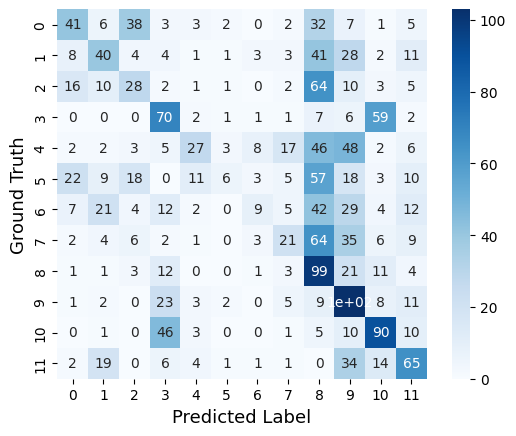

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(one_hot_labels_list, predicted_lists)
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("Predicted Label", fontsize=13)
plt.ylabel("Ground Truth", fontsize=13)

### Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

cv = 0
# for statement for K-fold
for _fold, (train_index, valid_index) in enumerate(skf.split(data, label)):
    train_dataset = Subset(dataset, train_index)
    train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
    valid_dataset = Subset(dataset, valid_index)
    valid_loader = DataLoader(valid_dataset, batch_size, shuffle=False)

    # 各foldでモデルは作り直す必要がある（テストデータを知ってしまっているから）

    # "for" statement for num_epoch per fold
    for epoch in range(num_epochs):
        # train loop
        model.train()
        for i, (signals, labels) in enumerate(train_loader):
            # learning
        
        # validation loop
        with torch.no_grad():
            model.eval()
            for j, (signals, labels) in enumerate(valid_loader):
                # validation
            cv += valid_loss / skf.n_splits

### wavelet reconstruction
まだよく分かっていないが，閾値処理を書く必要があるかも．

In [5]:
import pywt
def ecg_filter(data): # data: 1d array
    coeffs = pywt.wavedec(data,'db8',level=8)
    for i in np.arange(0,1,1):
        coeffs[i] = np.zeros_like(coeffs[i])
        # print(f"1: {i}")
    for i in np.arange(-1,-2,-1):
        coeffs[i] = np.zeros_like(coeffs[i])
        # print(f"2: {i}")
    # print(coeffs)
    renc = pywt.waverec(coeffs, 'db8')    
    return renc

In [1]:
data = np.arange(100)
plt.plot(data)
data = ecg_filter(data)
plt.plot(data)

NameError: name 'np' is not defined

/mnt/c/Users/grpro/workspace/grad_thesis/InceptionTime/env/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


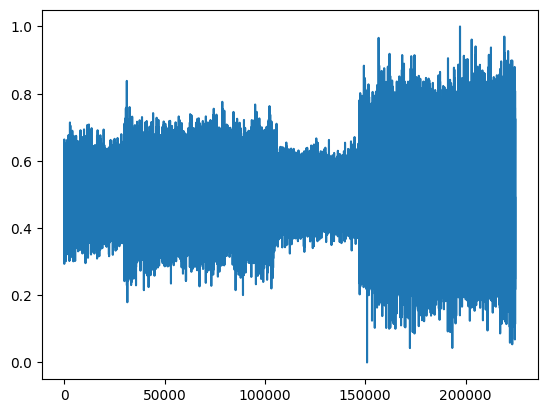

In [32]:
from scipy import signal
scaler = StandardScaler()
csv = pd.read_csv("./data/Keio Hospital/distance01.csv")
csv = csv.to_numpy()
# csv = signal.detrend(csv, type='constant')
csv = scaler.fit_transform(csv)
csv = ecg_filter(csv)
scaler = MinMaxScaler()
csv = scaler.fit_transform(csv)
plt.plot(csv[:, 1])
# csv = signal.detrend(csv, type='constant')
# csv = scaler.fit_transform(csv)
# plt.plot(csv[:])
# print(csv[0:100, 1])